# Reinforcement Learning


---


UCB algorithm Implementation.


## UCB Algorithm with Sublinear Regret

In [1]:
# UCB arm selection based on max of UCB reward of each arm
def select_arm(t,k,user_type):

    total_pulls = sum(pulls[:,user_type]) # Calculate the total number of pulls for the specified user_type

    # Calculate UCB values for each arm
    for arm in range(k):

        if pulls[arm][user_type] == 0:   # If arm hasn't been pulled yet, select it
            return arm
        # Calculate ucb value
        ucb_part[arm][user_type] = np.sqrt((2 * np.log(total_pulls)) / float(pulls[arm][user_type]))
        ucb[arm][user_type] = mu_i[arm][user_type] + ucb_part[arm][user_type]

    best_arm = ucb[:, user_type].argmax()    # Choose the arm with the highest UCB value for the specified user_type
    return best_arm


# Choose to update chosen arm and reward
def update(chosen_arm, reward, user_type):

    pulls[chosen_arm][user_type] += 1  # Increment the number of pulls for the chosen arm and user_type
    n_1 = pulls[chosen_arm][user_type]

    mu_1 = mu_i[chosen_arm][user_type] # Retrieve the current mean reward for the chosen arm and user_type

    # Update the mean reward for the chosen arm and user_type based on the new reward
    new_mu_i = ((n_1 - 1) / float(n_1)) * mu_1 + (1 / float(n_1)) * reward

    mu_i[chosen_arm][user_type] = new_mu_i  # Store the updated mean reward for the chosen arm and user_type
    return

## Testing

*   User types are drawn with **equal** probability
>For Horizon T= 1000 and T = 10000
*    User types are drawn with **different** probability
>For Horizon T= 1000 and T = 10000


In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

k = 5       # Number of arms
U = 4       # Number of users

#Array of probabilities for the different user types
p = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],  # Female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],  # Male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],  # Female under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]   # Male under 25
])
pulls = np.zeros((k,U)) # Array that holds the num of pulls for each hand
mu_i = np.zeros((k,U)) # Mean of reward for arm i (k arms in total.)
ucb_part = np.zeros((k,U)) # The squear root term of the formula
ucb = np.zeros((k,U)) # The ucb value

# For printing histograms
articles_selected = []
u0 = []
u1 = []
u2 = []
u3 = []

optimal = np.max(p, axis=1) # Max probability for each user [0.8, 0.8, 0.8, 0.8]

Testing function

In [3]:
def testing(T,user_type_prob):
    cum_reward = np.zeros((T)) # The cumulative reward
    regret = np.zeros((T,)) # The regret of each round
    cum_regret = np.zeros((T,)) # The cumulative regret
    best_score = np.zeros((T,)) # The best score
    mean_cum_regret = np.zeros((T,)) # The mean cummulative regret
    y = np.zeros((T,)) # For ploting the upper bound

    for t in range(T):
      # Generate user type based on user_type_prob with equal probability if it is 0 and different if it is 1
      if(user_type_prob == 1):
        probabilities = [0.6, 0.1, 0.2, 0.1]
        u = np.random.choice(len(probabilities), p=probabilities)
      else:
        u = random.randint(0,U-1)
      Best = select_arm(t,k,u)  # Select best arm for current user type
      reward = np.random.binomial(1, p[u][Best])  # Generate reward based on the probablities of the selected arm and user type
      update(Best, reward, u) # Update number of pulls and mu

      # For printing the histograms
      articles_selected.append(Best)
      if u == 0:
        u0.append(Best)
      elif u == 1:
        u1.append(Best)
      elif u == 2:
        u2.append(Best)
      elif u == 3:
        u3.append(Best)
      else:
        print('This user type does not exists mate!')

      # calculate cumulative rewards and regrets
      if t > 0:
        cum_reward[t] = cum_reward[t-1] + reward
        best_score[t] = best_score[t-1] + optimal[u]
      else:
        cum_reward[t] = reward
        best_score[t] = optimal[u]

      regret[t] = (best_score[t] - cum_reward[t])/(t+1)# Regret for each round t

      if t > 0:
        cum_regret[t] = cum_regret[t-1] + regret[t]
        mean_cum_regret[t] = mean_cum_regret[t-1] + regret[t]/(t+1)
      else:
        cum_regret[t] = regret[t]
        mean_cum_regret[t] = regret[t]/(t+1)

    return regret, cum_regret, mean_cum_regret, articles_selected, u0, u1, u2, u3


Plot functions

In [4]:
def plotingHistograms(articles_selected,u0, u1, u2, u3):
  # Plot histograms of article selections
  plt.title(f"Total Clicks with horizon T={T}")
  plt.hist(articles_selected, bins=np.arange(k+1)-0.5, rwidth=0.8)
  plt.xlabel('Article')
  plt.ylabel('Number of Selections')
  plt.show()

  plt.title("Female over 25")
  plt.hist(u0, bins=np.arange(k+1)-0.5, rwidth=0.8)
  plt.xlabel('Article')
  plt.ylabel('Number of Selections')
  plt.show()

  plt.title("Male over 25")
  plt.hist(u1, bins=np.arange(k+1)-0.5, rwidth=0.8)
  plt.xlabel('Article')
  plt.ylabel('Number of Selections')
  plt.show()

  plt.title("Female under 25")
  plt.hist(u2, bins=np.arange(k+1)-0.5, rwidth=0.8)
  plt.xlabel('Article')
  plt.ylabel('Number of Selections')
  plt.show()

  plt.title("Male over 25")
  plt.hist(u3, bins=np.arange(k+1)-0.5, rwidth=0.8)
  plt.xlabel('Article')
  plt.ylabel('Number of Selections')
  plt.show()

In [5]:
def plotRegret(T, regret, cum_regret, mean_cum_regret ):
  plt.plot(regret, label='Regret')
  plt.xlabel('Round')
  plt.ylabel('Regret')
  plt.title('Regret')
  plt.legend()
  plt.show()

  x = np.linspace(0, T, T)
  y = x
  plt.plot(cum_regret, label='Cumulative Regret')
  plt.plot(y,linestyle='--')
  plt.xlabel('Round')
  plt.ylabel('Regret')
  plt.title('Cumulative Regret')
  plt.legend()
  plt.show()

  x = np.linspace(1, T, T)
  z = np.log(x) #the upper bound
  plt.plot(mean_cum_regret, label='Mean Cumulative Regret')
  plt.plot(z, label='Upper Bound' ,linestyle='--')
  plt.xlabel('Round')
  plt.ylabel('Regret')
  plt.title('Mean Cumulative Regret')
  plt.legend()
  plt.show()

Ploting for T = 1000 while usertypes are drawn **equal** probability

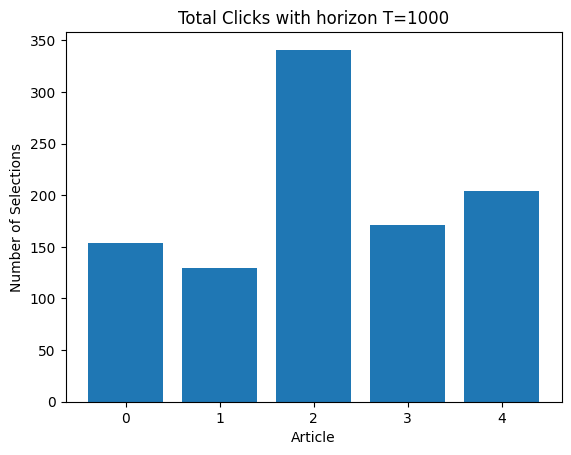

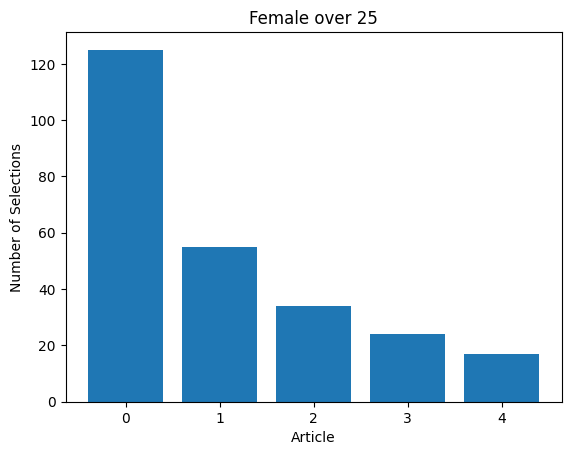

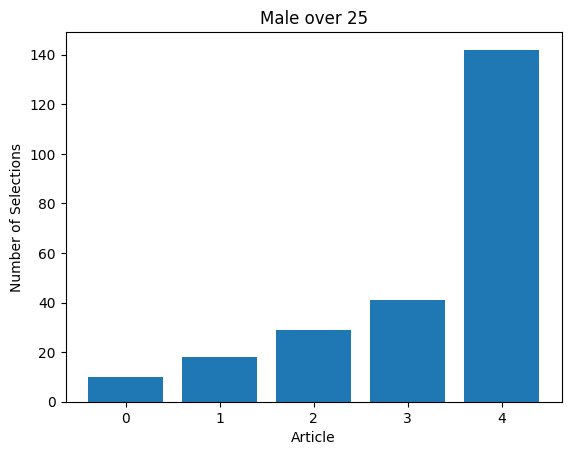

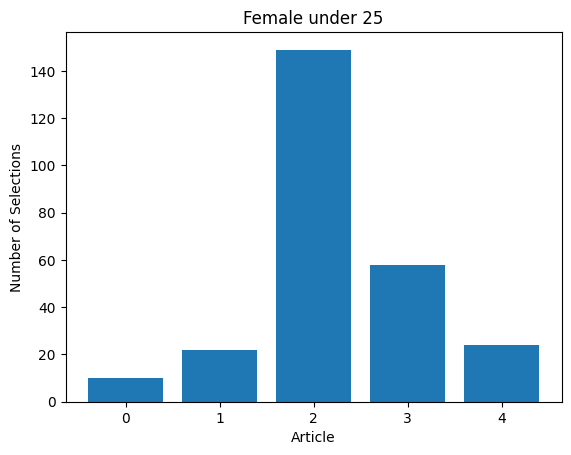

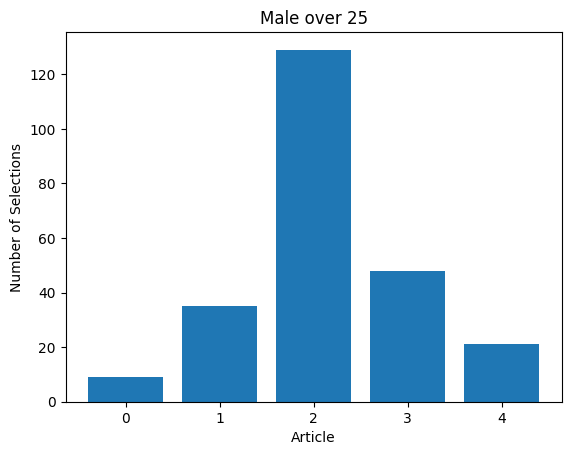

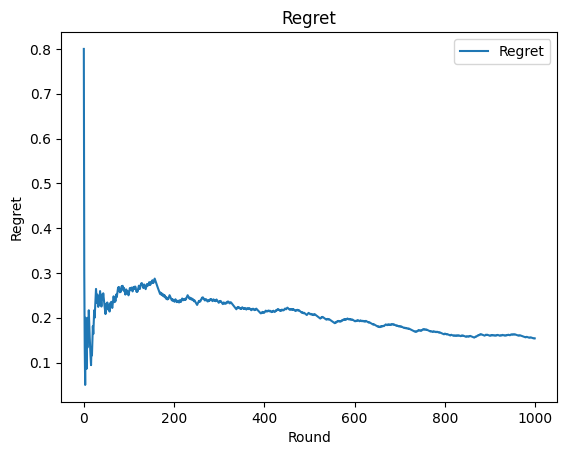

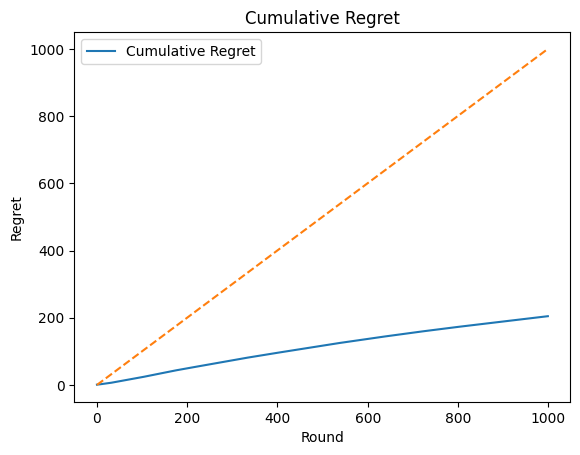

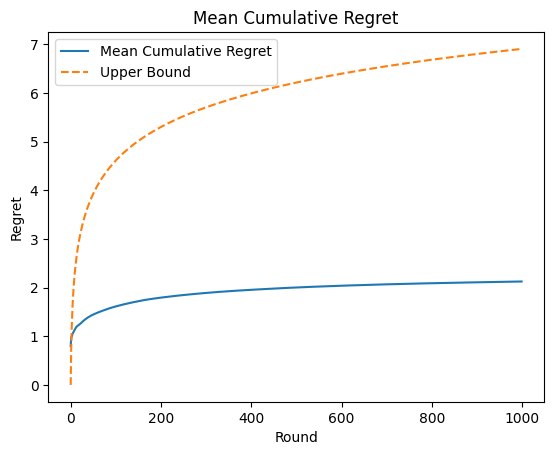

In [6]:
T = 1000   #horizon
regret, cum_regret, mean_cum_regret, articles_selected, u0, u1, u2, u3 = testing(T,0)
plotingHistograms(articles_selected, u0, u1, u2, u3)
plotRegret(T,regret, cum_regret, mean_cum_regret)

Ploting for T = 10000 while usertypes are drawn **equal** probability

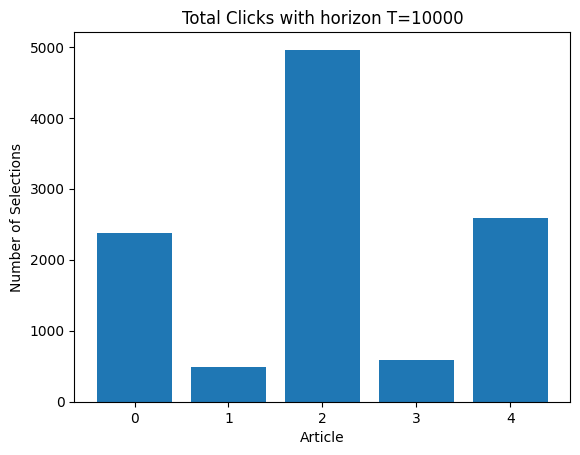

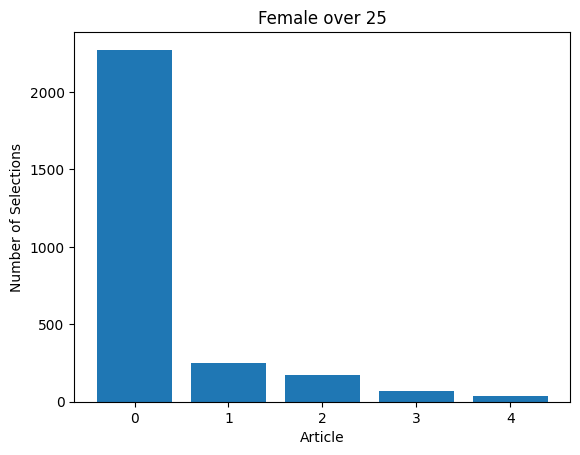

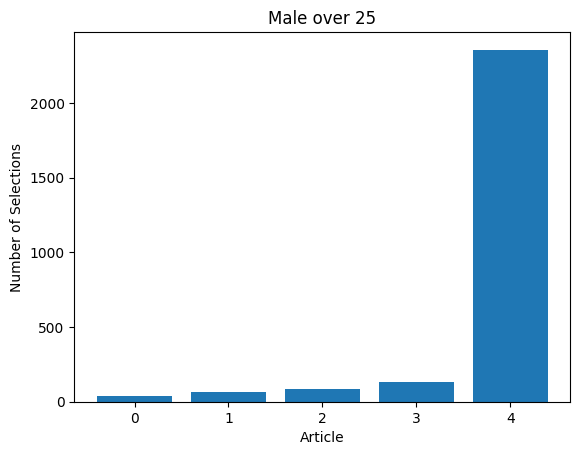

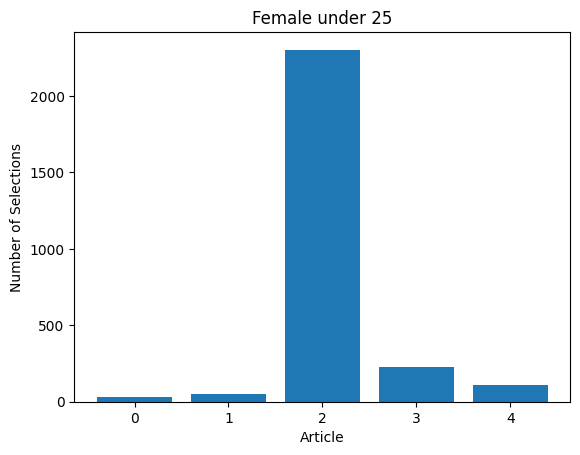

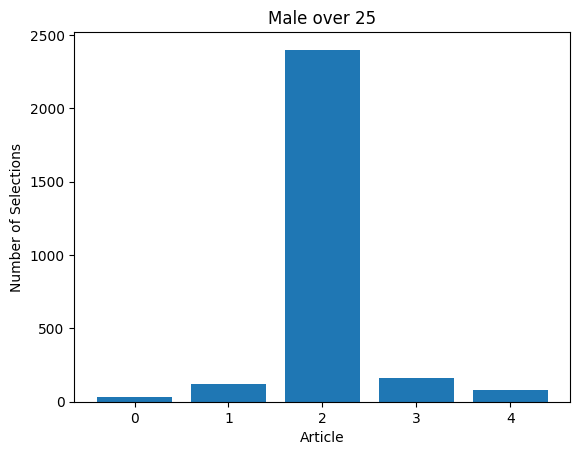

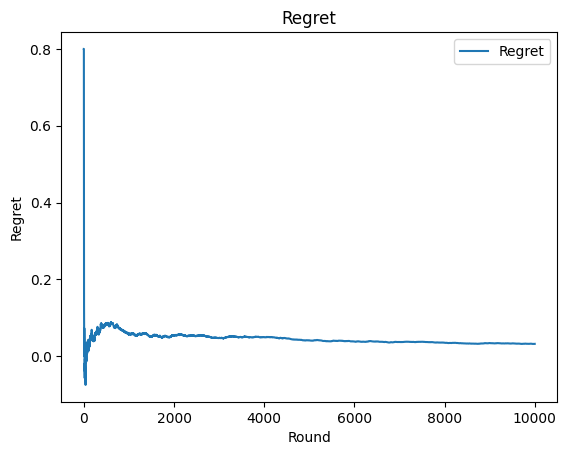

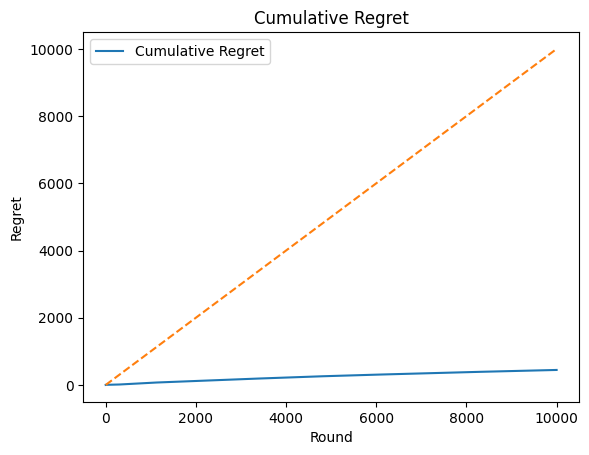

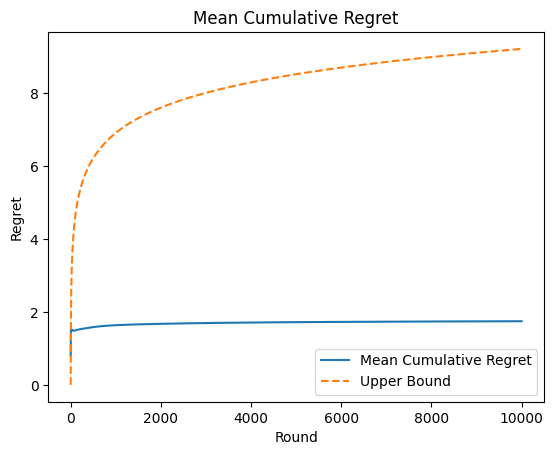

In [7]:
T = 10000   #horizon
regret, cum_regret, mean_cum_regret, articles_selected, u0, u1, u2, u3 = testing(T,0)
plotingHistograms(articles_selected, u0, u1, u2, u3)
plotRegret(T,regret, cum_regret, mean_cum_regret)

Ploting for T = 1000 while usertypes are drawn **different** probability

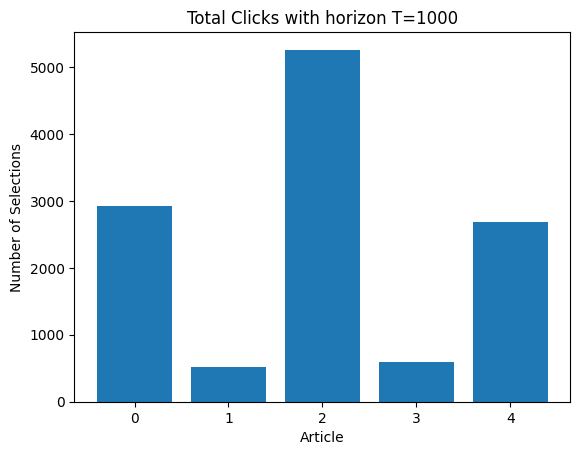

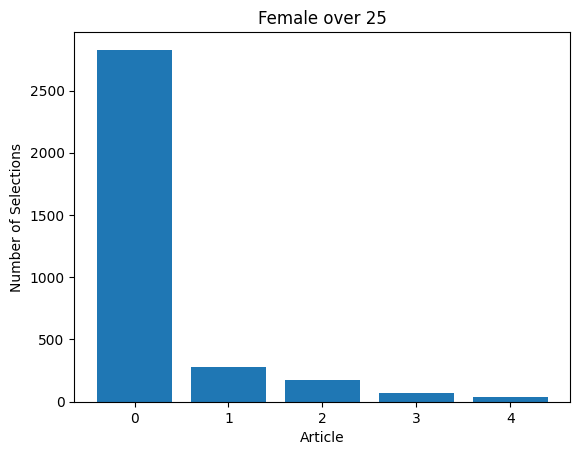

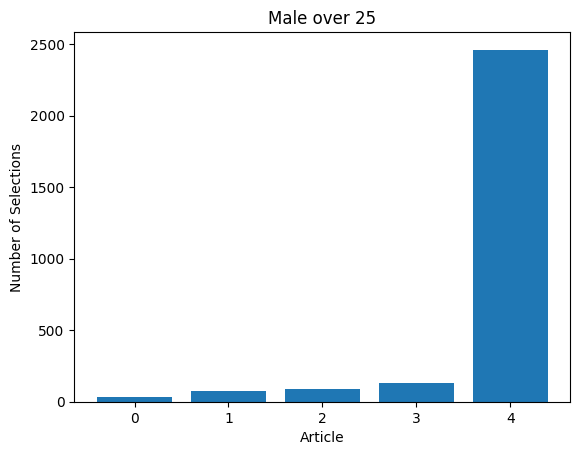

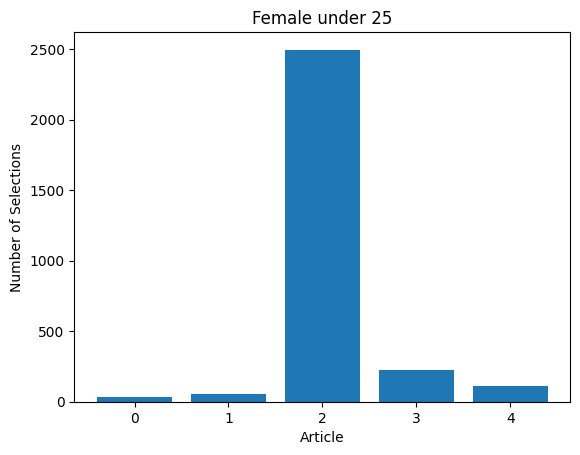

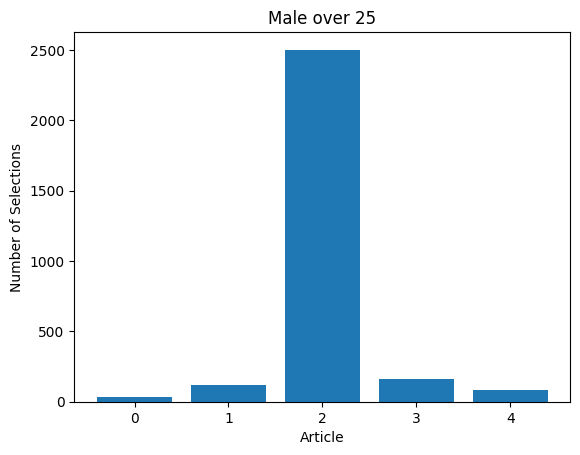

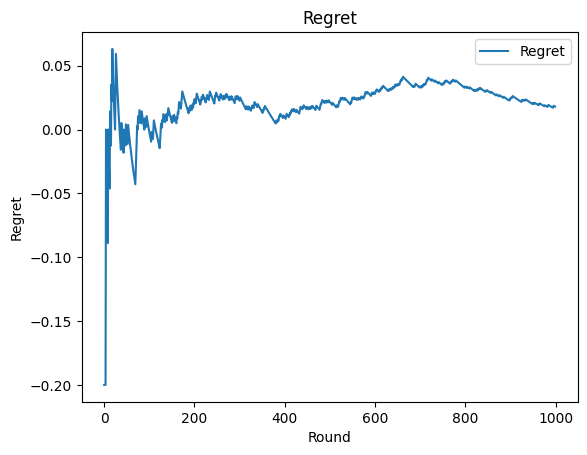

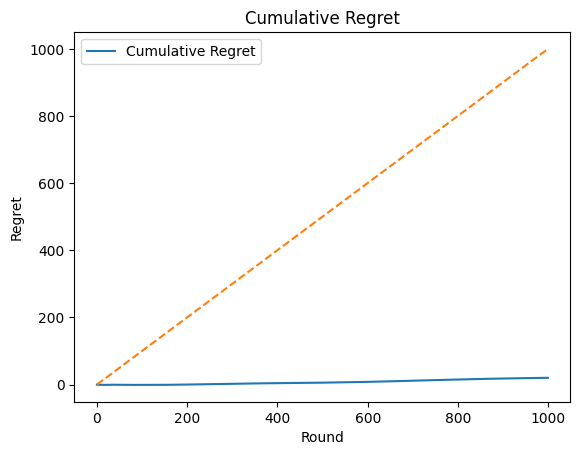

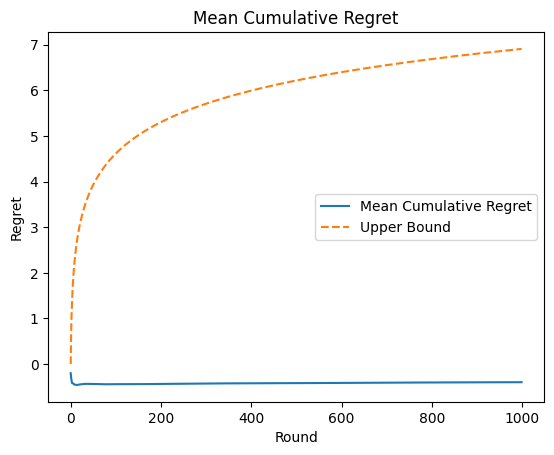

In [8]:
T = 1000   #horizon
regret, cum_regret, mean_cum_regret, articles_selected, u0, u1, u2, u3 = testing(T,1)
plotingHistograms(articles_selected, u0, u1, u2, u3)
plotRegret(T,regret, cum_regret, mean_cum_regret)


Ploting for T = 10000 while usertypes are drawn **different** probability

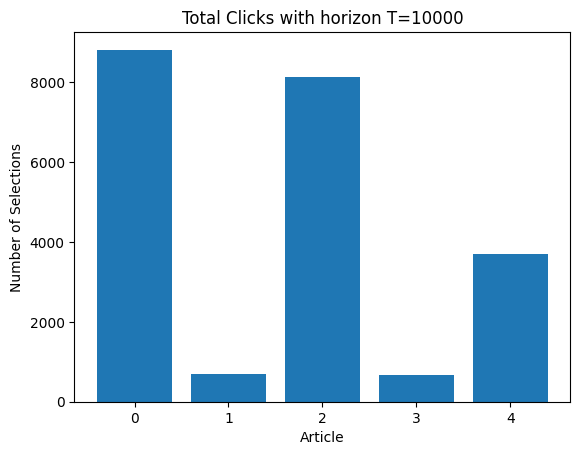

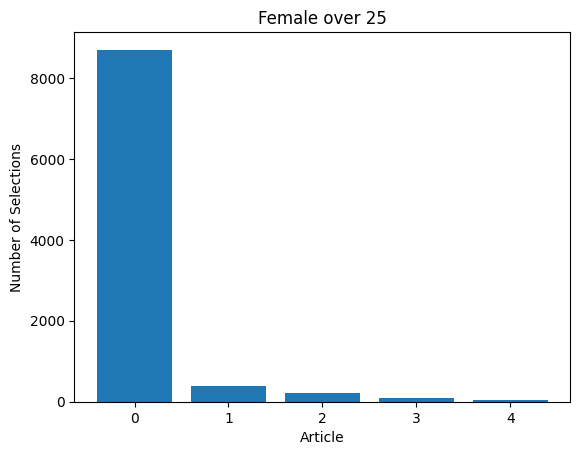

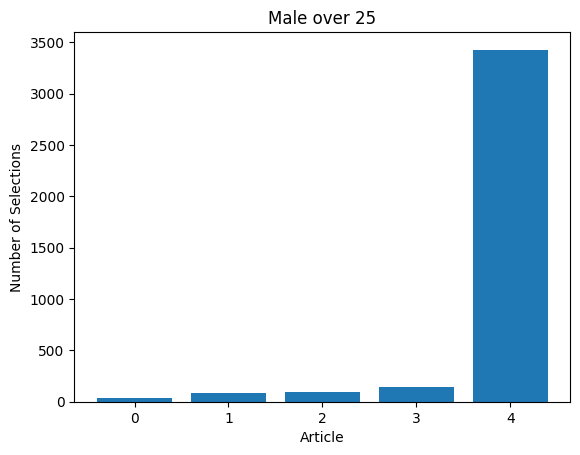

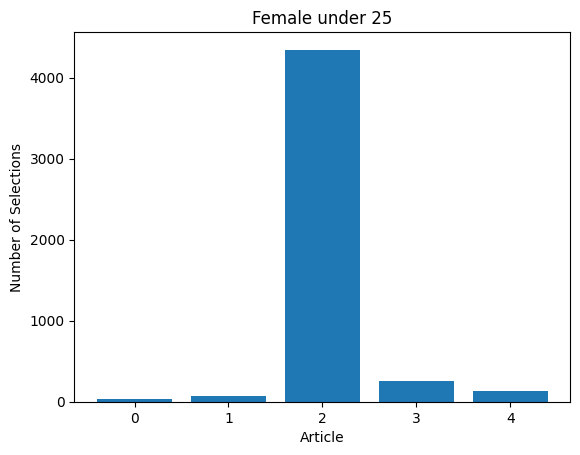

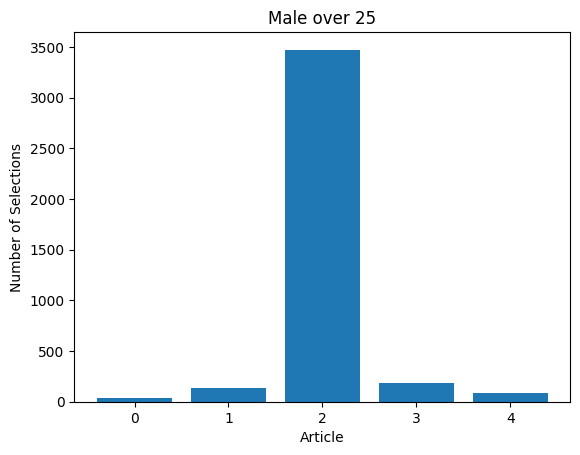

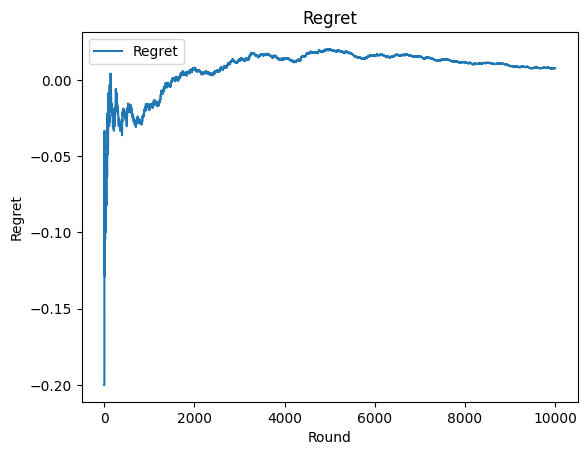

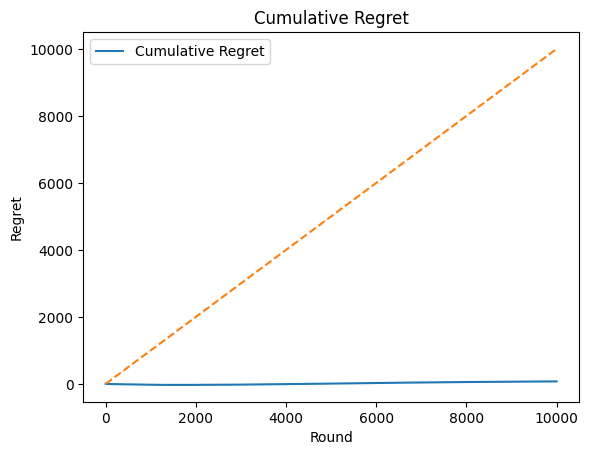

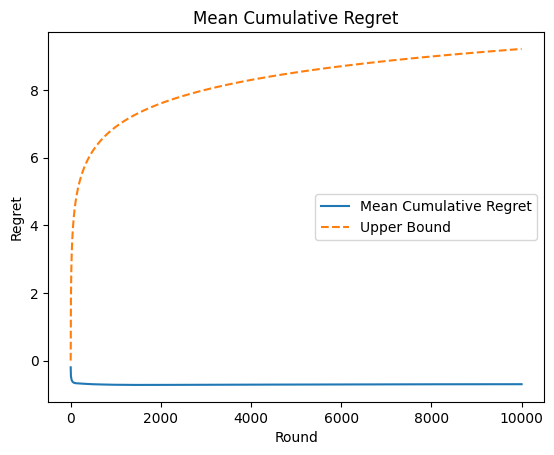

In [9]:
T = 10000   #horizon
regret, cum_regret, mean_cum_regret, articles_selected, u0, u1, u2, u3 = testing(T,1)
plotingHistograms(articles_selected, u0, u1, u2, u3)
plotRegret(T,regret, cum_regret, mean_cum_regret)